In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


# Temporal-difference - TD(0) or one-step

In [2]:
# parameters
gamma = 0.5 # discounting rate
rewardSize = -1
gridSize = 4
alpha = 0.5 # (0,1] // stepSize
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [3]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [4]:
# utils
def generateInitialState():
    initState = random.choice(states[1:-1])
    return initState

def generateNextAction():
    return random.choice(actions)

def takeAction(state, action):
    if list(state) in terminationStates:
        return 0, None
    finalState = np.array(state)+np.array(action)
    # if robot crosses wall
    if -1 in list(finalState) or gridSize in list(finalState):
        finalState = state
    return rewardSize, list(finalState)

In [8]:
generateInitialState()

[2, 3]

In [9]:
generateNextAction()

[-1, 0]

In [14]:
takeAction([2, 3],[-1, 0])

(-1, [1, 3])

In [15]:
finalState

In [5]:
for it in tqdm(range(numIterations)):
    state = generateInitialState()
    while True:
        action = generateNextAction()
        reward, finalState = takeAction(state, action)
        
        # we reached the end
        if finalState is None:
            break
        
        # modify Value function
        before =  V[state[0], state[1]]
        V[state[0], state[1]] += alpha*(reward + gamma*V[finalState[0], finalState[1]] - V[state[0], state[1]])
        deltas[state[0], state[1]].append(float(np.abs(before-V[state[0], state[1]])))
        
        state = finalState

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3189.89it/s]


In [6]:
V

array([[ 0.        , -1.48170604, -1.98388576, -1.98928094],
       [-1.47585816, -1.98080163, -1.97327833, -1.90253155],
       [-1.97289221, -1.98068724, -1.90921707, -1.32713737],
       [-1.98933341, -1.96989634, -1.22825683,  0.        ]])

# using gamma = 0.1 // alpha = 0.1 (convergence)

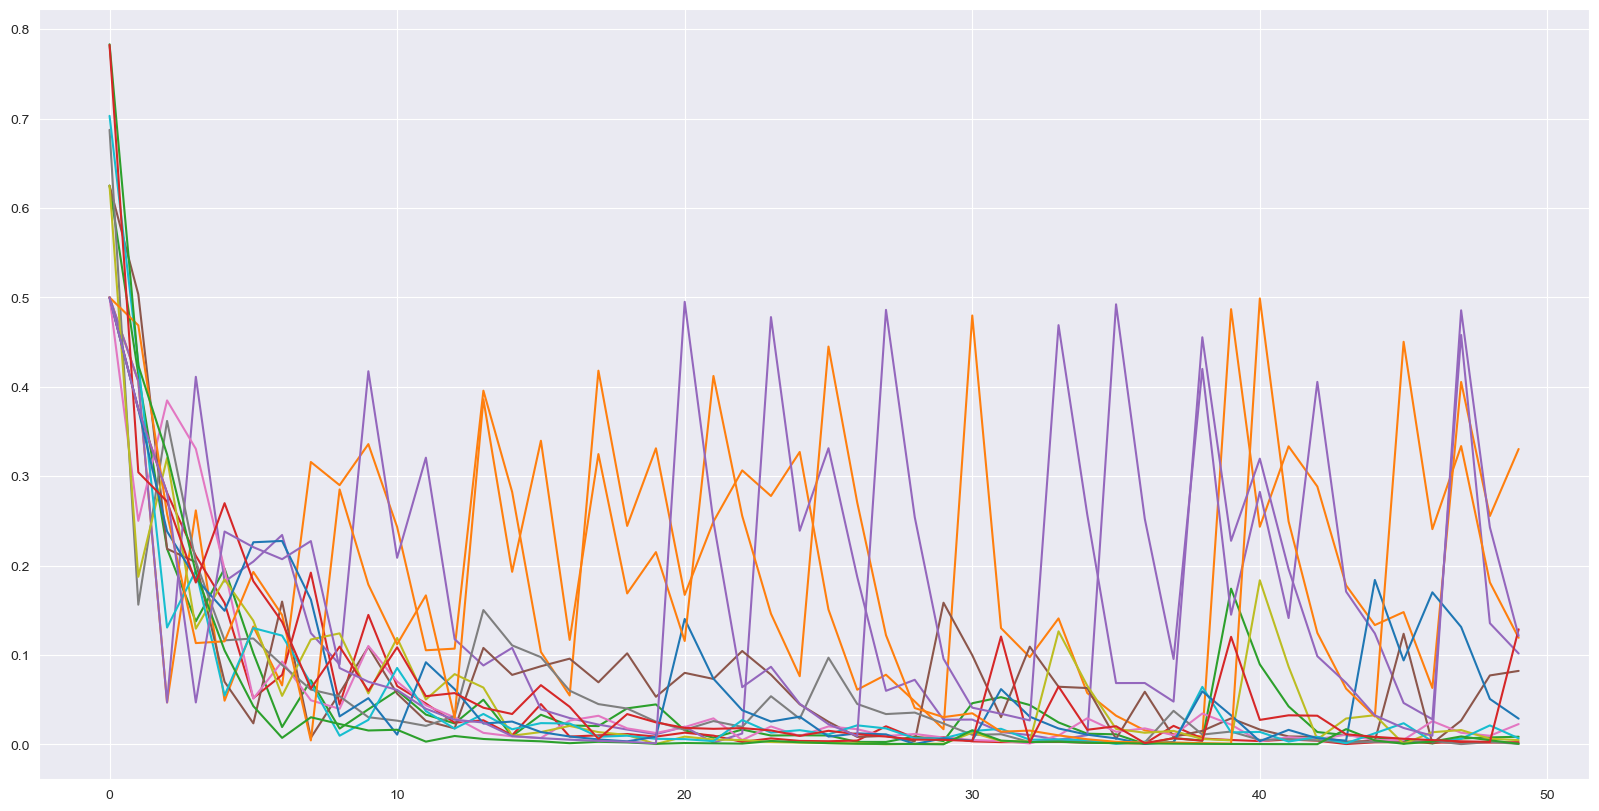

In [7]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)